In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from panel_ow import Panel
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size" : 46,
    "lines.linewidth" : 2,
})


In [2]:
f = Panel(A=10, rs=1, rsh=1000, n=2, voc=0.64, isc=35e-3, G=1, Gac = 1e10)
f.run(False)
i10 = f.I
v10 = f.V
r10 = f.Rl

In [3]:
f = Panel(A=10, rs=1, rsh=1000, n=2, voc=0.64, isc=35e-3, G=0.6, Gac = 1e10)
f.run(False)
i06 = f.I
v06 = f.V
r06 = f.Rl

In [4]:
f = Panel(A=10, rs=1, rsh=1000, n=2, voc=0.64, isc=35e-3, G=0.8, Gac = 1e10)
f.run(False)
i08 = f.I
v08 = f.V
r08 = f.Rl

In [5]:
f = Panel(A=10, rs=1, rsh=1000, n=2, voc=0.64, isc=35e-3, G=1.2, Gac = 1e10)
f.run(False)
i12 = f.I
v12 = f.V
r12 = f.Rl

In [6]:
f = Panel(A=10, rs=1, rsh=1000, n=2, voc=0.64, isc=35e-3, G=1.4, Gac = 1e10)
f.run(False)
i14 = f.I
v14 = f.V
r14 = f.Rl

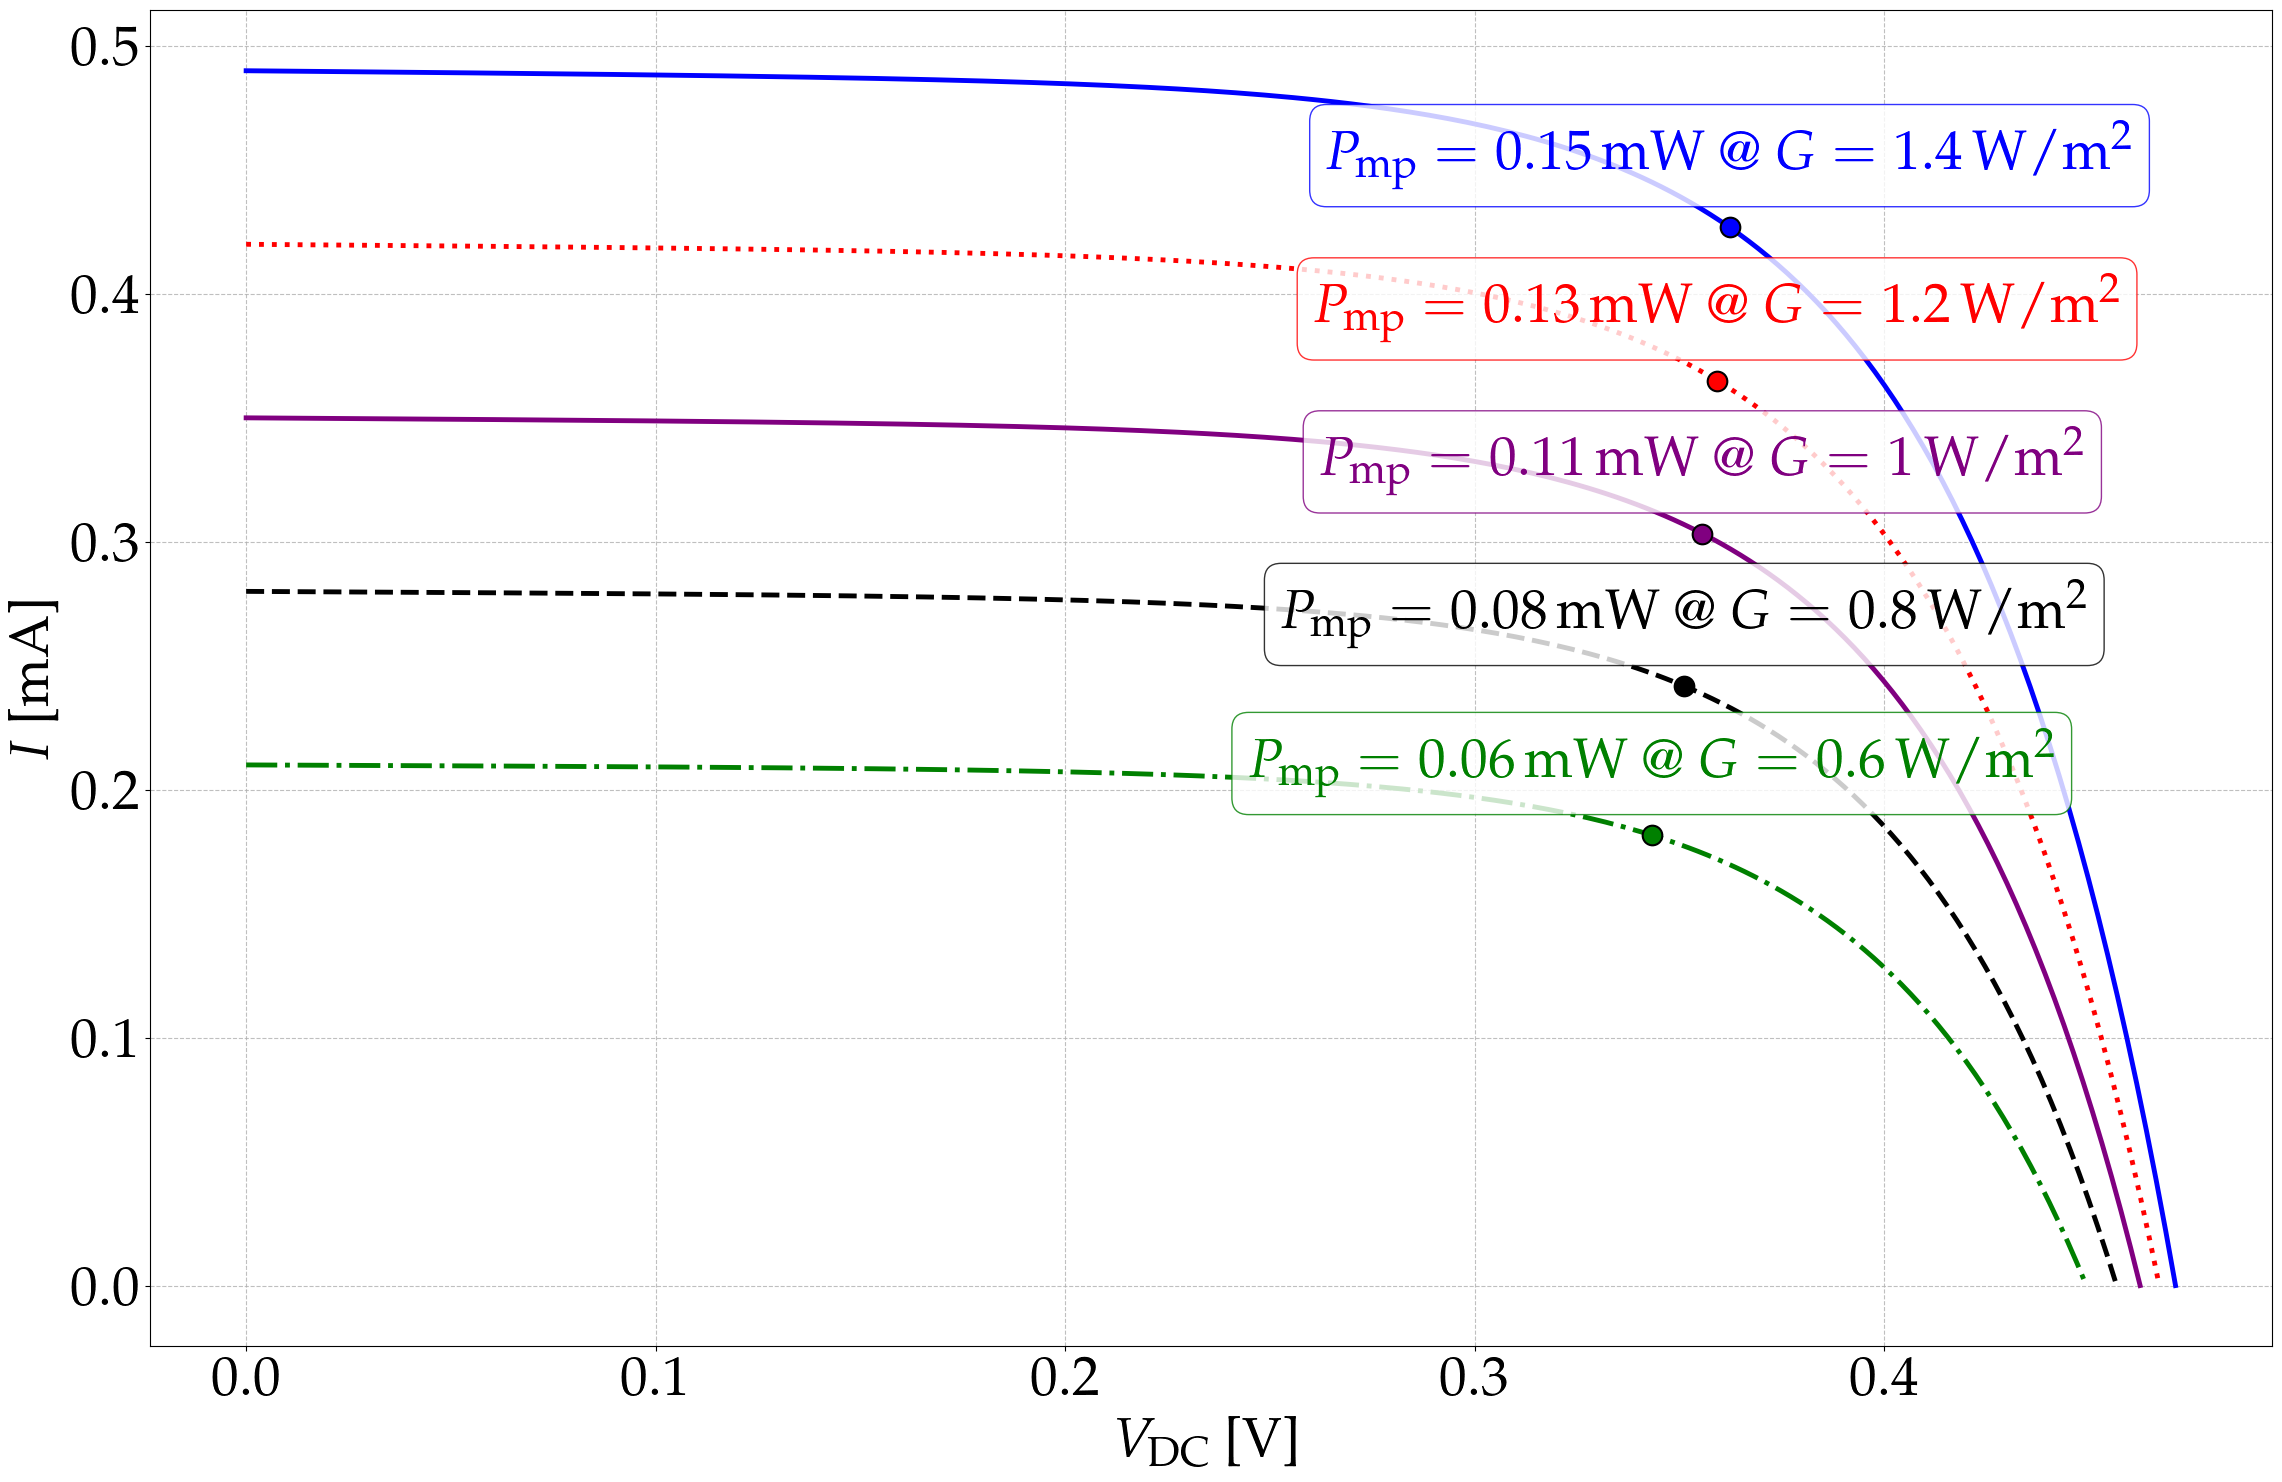

In [12]:
def plot_curve_with_mpp(v, i, color, label, G, linestyle, vertical_offset=0.1):
    power = v * i
    max_index = np.argmax(power)
    mpp_v, mpp_i = v[max_index], i[max_index]

    # Plot the I-V curve
    plt.plot(v, i, color=color, linestyle=linestyle, label=label, linewidth=3.5)
    
    # Highlight the MPP
    plt.scatter(
        mpp_v, mpp_i, color=color, marker='o',
        zorder=20, s=200, edgecolor='black', linewidth=1.5
    )
    
    # Annotate directly above the MPP
    plt.text(
        mpp_v,                      # center horizontally
        mpp_i + vertical_offset,    # small vertical offset upward
        rf"$P_\mathrm{{mp}} = {mpp_v * mpp_i:.2f} \, \mathrm{{mW}}$ @ $G = {G} \, \mathrm{{W/m^2}}$",
        fontsize=40, 
        color=color,
        ha='center',                # center text horizontally over the point
        va='bottom',                # align text just above the point
        bbox=dict(
            facecolor='white', alpha=0.8,
            edgecolor=color, boxstyle='round,pad=0.3'
        )
    )

plt.figure(figsize=(24, 16))

plot_curve_with_mpp(v10, i10 * 1000, 'purple', "$G = 1 W/m^2$", 1, '-', vertical_offset=0.015)
plot_curve_with_mpp(v08, i08 * 1000, 'black', "G = 0.8 W/m²", 0.8, '--', vertical_offset=0.015)
plot_curve_with_mpp(v06, i06 * 1000, 'green', "G = 0.6 W/m²", 0.6, '-.', vertical_offset=0.015)
plot_curve_with_mpp(v12, i12 * 1000, 'red', "G = 1.2 W/m²", 1.2, ':', vertical_offset=0.015)
plot_curve_with_mpp(v14, i14 * 1000, 'blue', "G = 1.4 W/m²", 1.4, '-', vertical_offset=0.015)

plt.xlabel('$V_\mathrm{DC}$ [V]', fontsize=40)
plt.ylabel('$I$ [mA]', fontsize=40)
#plt.title('I-V Curves for Indoor Irradiance Levels', fontsize=36)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.savefig("iv_curve.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()


In [94]:
r10

array([0.00000000e+00, 6.64114536e+00, 1.32832512e+01, 1.99263231e+01,
       2.65703671e+01, 3.32153895e+01, 3.98613970e+01, 4.65083968e+01,
       5.31563964e+01, 5.98054039e+01, 6.64554275e+01, 7.31064764e+01,
       7.97585601e+01, 8.64116885e+01, 9.30658724e+01, 9.97211230e+01,
       1.06377452e+02, 1.13034873e+02, 1.19693398e+02, 1.26353042e+02,
       1.33013820e+02, 1.39675748e+02, 1.46338842e+02, 1.53003120e+02,
       1.59668601e+02, 1.66335305e+02, 1.73003253e+02, 1.79672467e+02,
       1.86342970e+02, 1.93014788e+02, 1.99687947e+02, 2.06362473e+02,
       2.13038398e+02, 2.19715752e+02, 2.26394567e+02, 2.33074878e+02,
       2.39756722e+02, 2.46440138e+02, 2.53125166e+02, 2.59811850e+02,
       2.66500235e+02, 2.73190370e+02, 2.79882305e+02, 2.86576094e+02,
       2.93271795e+02, 2.99969466e+02, 3.06669172e+02, 3.13370979e+02,
       3.20074959e+02, 3.26781185e+02, 3.33489736e+02, 3.40200696e+02,
       3.46914153e+02, 3.53630199e+02, 3.60348931e+02, 3.67070454e+02,
      

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curve_with_mpp(v, i, r, color, label, G, linestyle, dx=0.0, dy_ratio=0.05):
    power = v * i
    max_index = np.argmax(power)

    mpp_v = v[max_index]
    mpp_r = r[max_index]

    # Plot the R–V curve
    plt.plot(v, r, color=color, linestyle=linestyle, label=label, linewidth=3.5)

    # Highlight the MPP point
    plt.scatter(
        mpp_v, mpp_r,
        color=color, marker='o', zorder=20,
        s=250, edgecolor='black', linewidth=1.5
    )

    # Compute adaptive offset
    dy = mpp_r * dy_ratio

    # Annotate label (movable)
    plt.text(
        mpp_v + dx,
        mpp_r + dy,
        rf"$R_\mathrm{{mp}} = {mpp_r:.0f}\,\Omega$",
        fontsize=40,
        color=color,
        ha='center',
        va='bottom',
        bbox=dict(
            facecolor='white',
            alpha=0.85,
            edgecolor=color,
            boxstyle='round,pad=0.3'
        )
    )


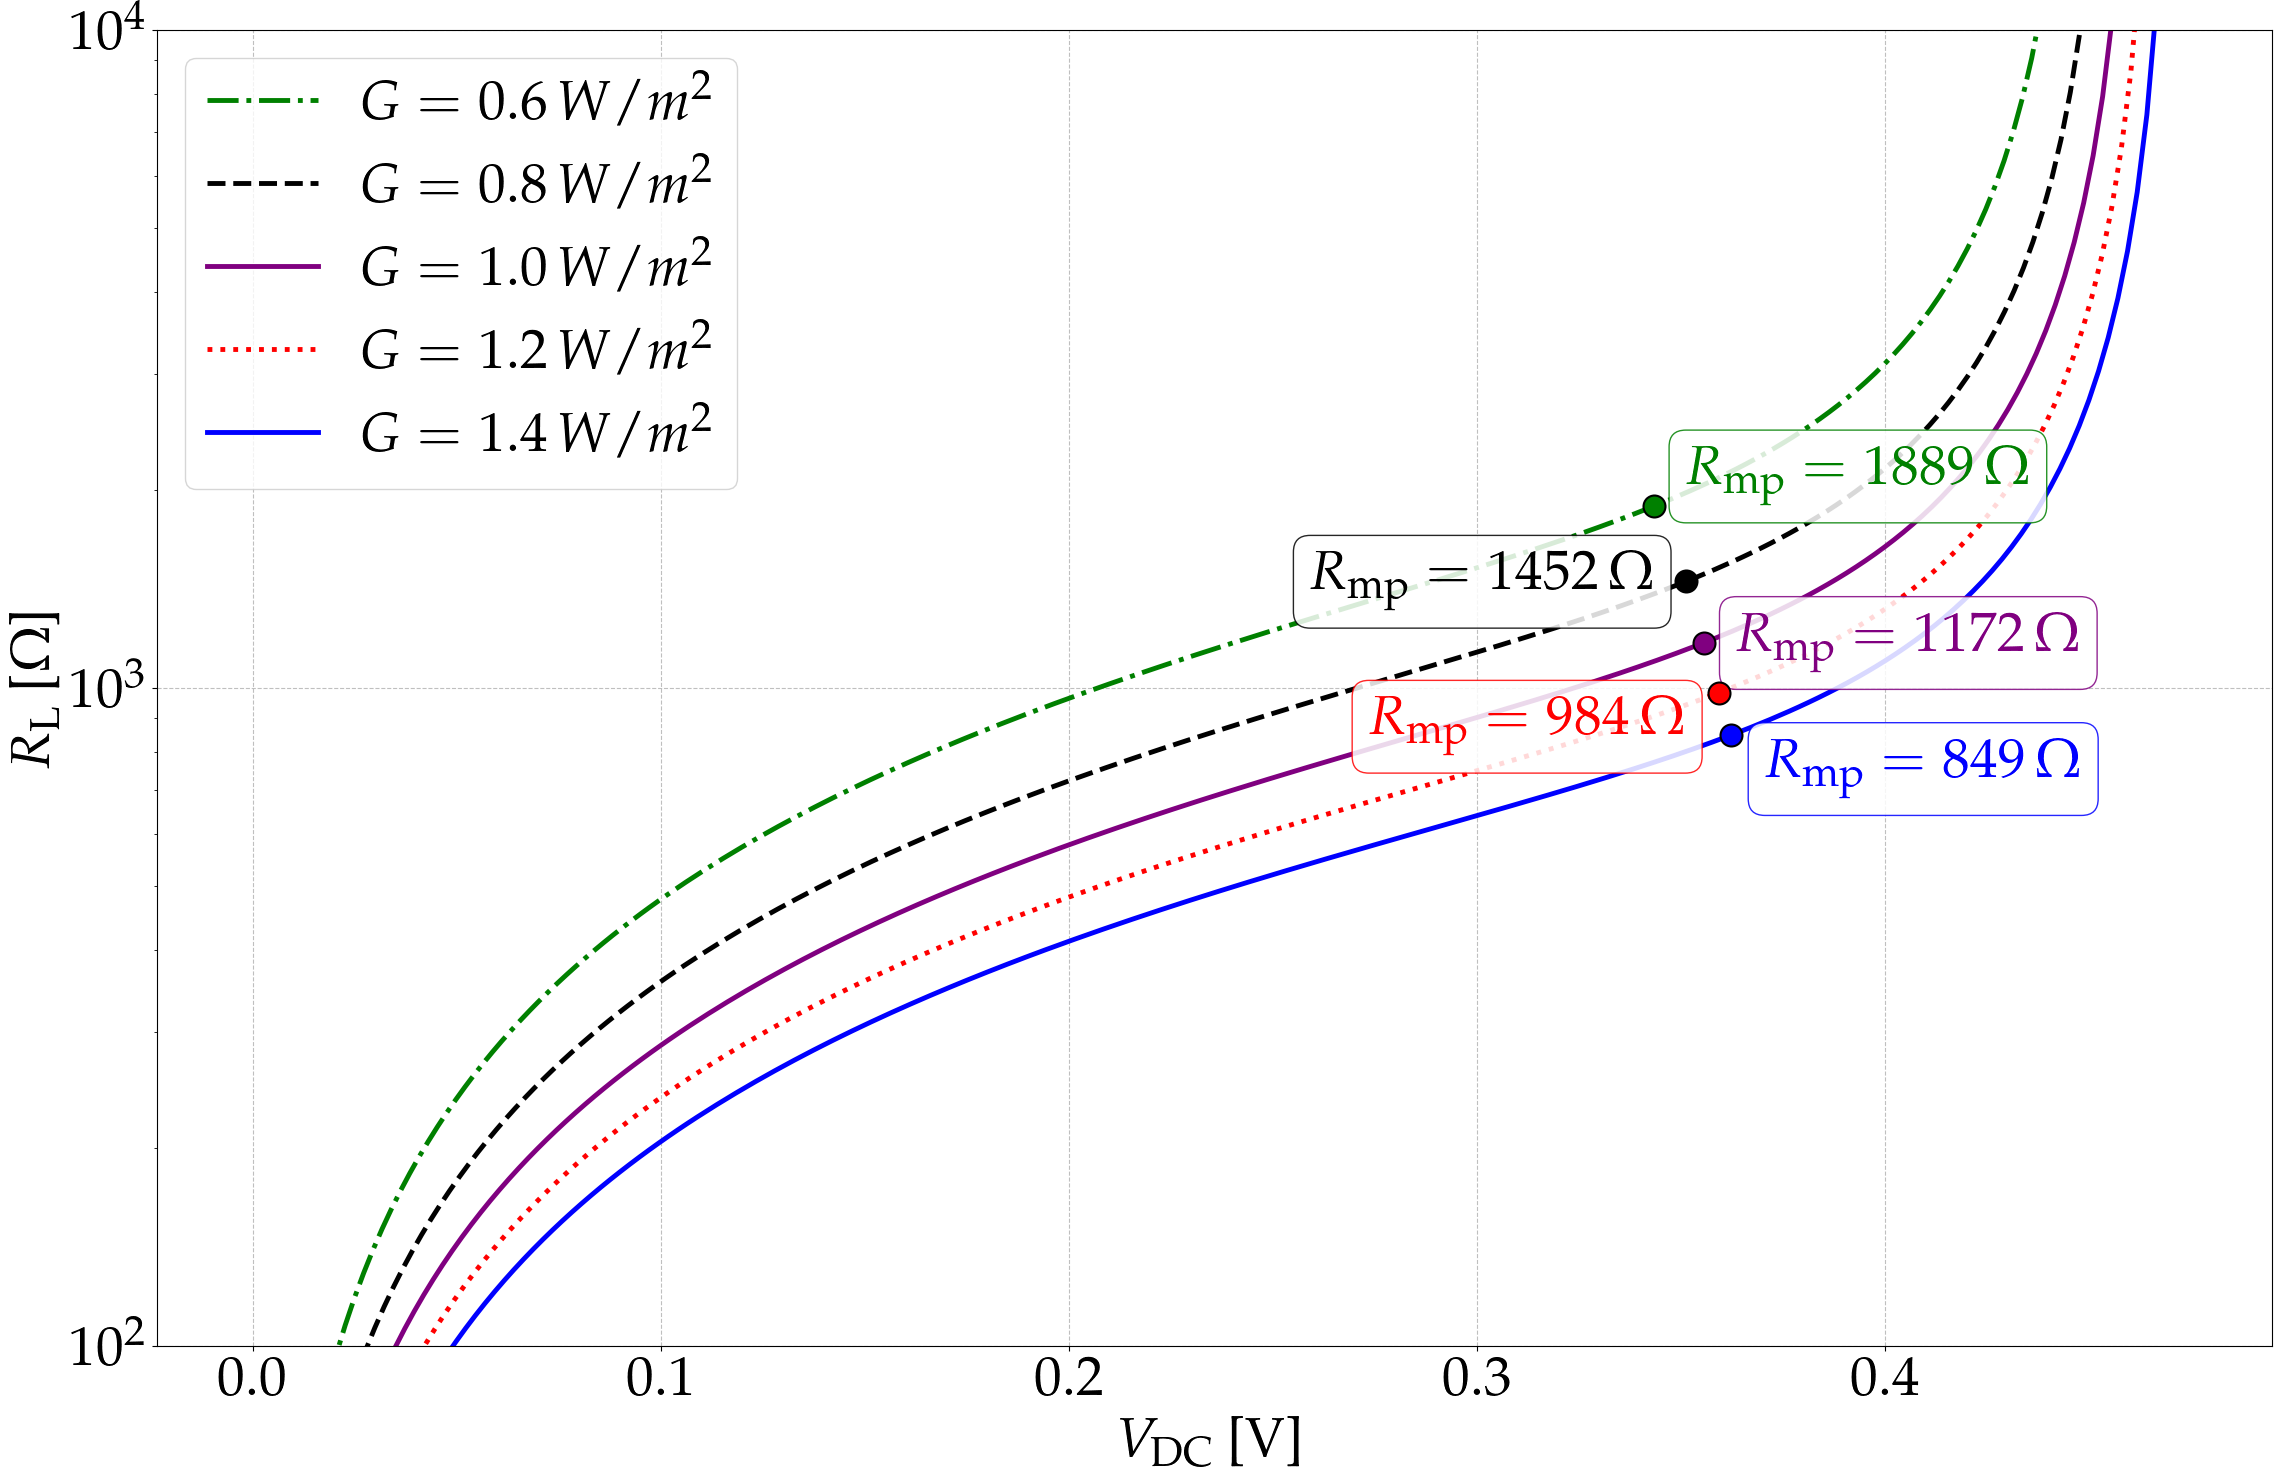

In [48]:
plt.figure(figsize=(24, 16))


plot_curve_with_mpp(v06, i06, r06, 'green',  "$G = 0.6\,W/m^2$", 0.6, '-.', dx=0.05, dy_ratio=0)
plot_curve_with_mpp(v08, i08, r08, 'black',  "$G = 0.8\,W/m^2$", 0.8, '--', dx=-0.05, dy_ratio=-0.1)
plot_curve_with_mpp(v10, i10, r10, 'purple', "$G = 1.0\,W/m^2$", 1.0, '-', dx=0.05, dy_ratio=-0.1)
plot_curve_with_mpp(v12, i12, r12, 'red',    "$G = 1.2\,W/m^2$", 1.2, ':', dx=-0.047, dy_ratio=-0.2)
plot_curve_with_mpp(v14, i14, r14, 'blue',   "$G = 1.4\,W/m^2$", 1.4, '-', dx=0.047, dy_ratio=-0.2)

plt.xlabel('$V_\\mathrm{DC}$ [V]', fontsize=40)
plt.ylabel('$R_\mathrm{L}$ [$\\Omega$]', fontsize=40)
plt.yscale('log')
plt.ylim(1e2, 1e4)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend(fontsize=40, loc='upper left')
plt.tight_layout()
plt.savefig("RV.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

